#**3D Dipole Diffuse**
##Standard Settings
**Particle = $^{199}Hg$**

**Gyromagnetic ratio = $-4.84578839927 \times 10^7\,\frac{1}{T s}$**

**Magnetic field ($B_0$) = $1\,\mu T$**

**Electric field ($E_0$) = $0.5\,\frac{MV}{m}$**

**Chamber height = $12\,cm$**

**Chamber radius = $23.5\,cm$**

** Time Limit = $100\,s$**

**3D simulations**

**Each point represents the results of 10000 particles ran for both parallel and anti-parallel configurations on the same tracks**

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import srkgraphics
import srkmisc
import srkdata
import numpy as np
import srkanalysis

##**Diffuse reflection probability = $100\%$**

In [36]:
lines = [range(4822,4828),range(4833,4839),range(4844,4850),range(4855,4861),range(4866,4872),range(4876,4883)]
rid_list2=range(4886,4952)
rid_chunks = [rid_list2[x:x+11] for x in xrange(0, len(rid_list2), 11)]

lines = [rid_chunks[i]+lines[i] for i in range(len(rid_chunks))]
print lines
legend_titles = ["{:.1e}".format(srkdata.get_data_for_rids_from_database([x[0]],"DipoleFieldStrength")[0][0]
)+ ' $T m^{3}$' for x in lines]

[[4886, 4887, 4888, 4889, 4890, 4891, 4892, 4893, 4894, 4895, 4896, 4822, 4823, 4824, 4825, 4826, 4827], [4897, 4898, 4899, 4900, 4901, 4902, 4903, 4904, 4905, 4906, 4907, 4833, 4834, 4835, 4836, 4837, 4838], [4908, 4909, 4910, 4911, 4912, 4913, 4914, 4915, 4916, 4917, 4918, 4844, 4845, 4846, 4847, 4848, 4849], [4919, 4920, 4921, 4922, 4923, 4924, 4925, 4926, 4927, 4928, 4929, 4855, 4856, 4857, 4858, 4859, 4860], [4930, 4931, 4932, 4933, 4934, 4935, 4936, 4937, 4938, 4939, 4940, 4866, 4867, 4868, 4869, 4870, 4871], [4941, 4942, 4943, 4944, 4945, 4946, 4947, 4948, 4949, 4950, 4951, 4876, 4877, 4878, 4879, 4880, 4881, 4882]]


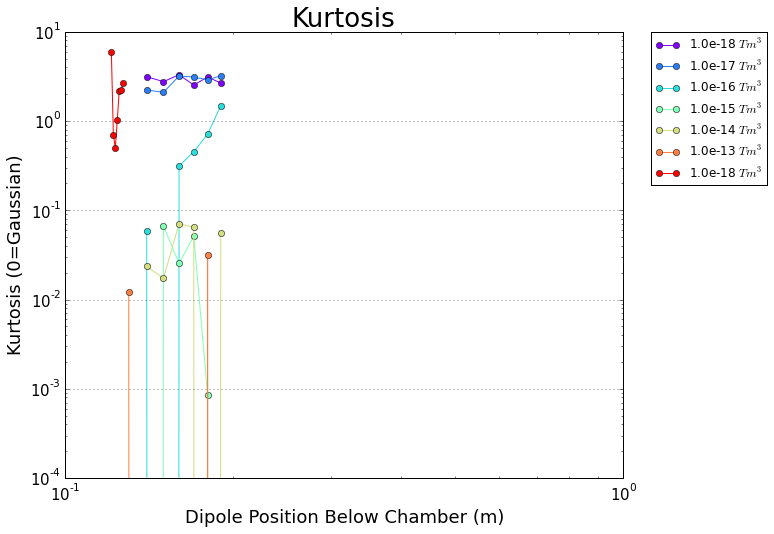

In [22]:
reload(srkgraphics)
columns=["DipolePositionBelowChamber","Par_PhiKurtosis"]
titles=["Kurtosis","Dipole Position Below Chamber (m)","Kurtosis (0=Gaussian)"]
lambdas=[lambda x : -x,lambda x: x]
# print lines[0]
srkgraphics.make_plot_from_database(lines,columns,titles,legend_titles,lambdas)
plt.yscale('log', noncvposy='clip')
plt.xscale('log', noncvposy='clip')
plt.show()

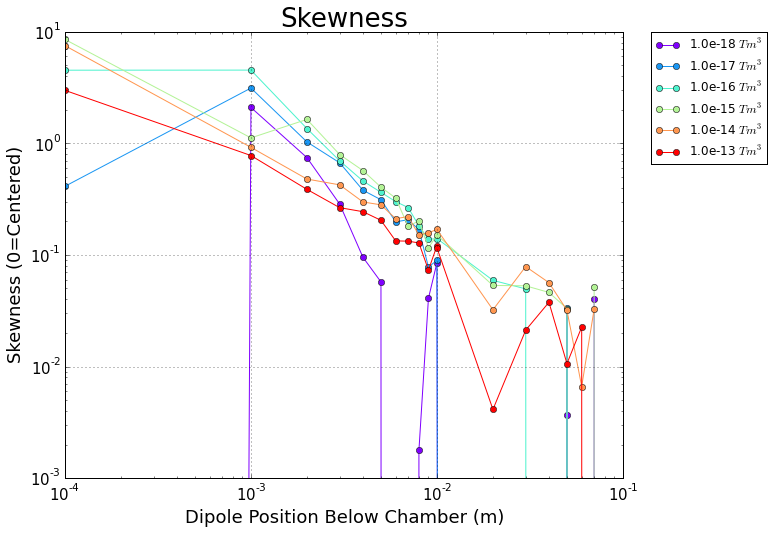

In [34]:
reload(srkgraphics)
columns=["DipolePositionBelowChamber","Par_PhiSkewness"]
titles=["Skewness","Dipole Position Below Chamber (m)","Skewness (0=Centered)"]
lambdas=[lambda x : -x,lambda x: x]
# print lines[0]
srkgraphics.make_plot_from_database(lines,columns,titles,legend_titles,lambdas)
plt.yscale('log', noncvposy='clip')
plt.xscale('log', noncvposy='clip')
plt.show()

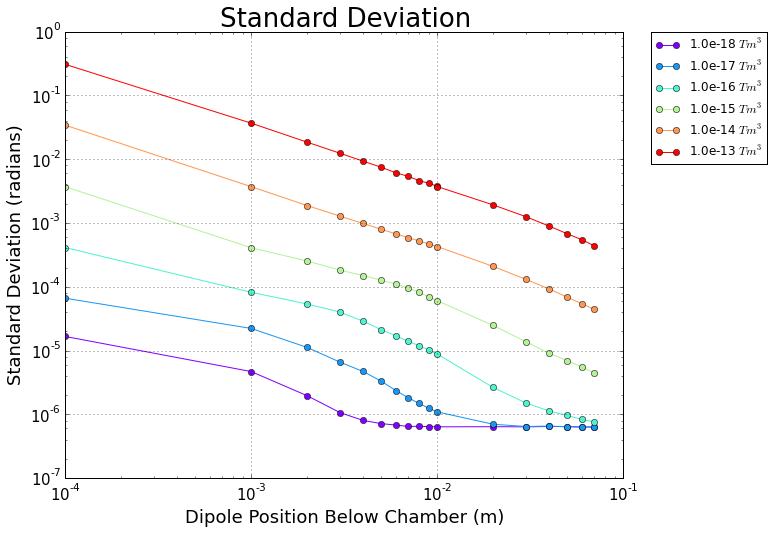

In [35]:
columns=["DipolePositionBelowChamber","Par_PhiStDev"]
titles=["Standard Deviation","Dipole Position Below Chamber (m)","Standard Deviation (radians)"]
lambdas=[lambda x : -x,lambda x: x]
srkgraphics.make_plot_from_database(lines,columns,titles,legend_titles,lambdas)
plt.yscale('log', noncvposy='clip')
plt.xscale('log', noncvposy='clip')
plt.show()

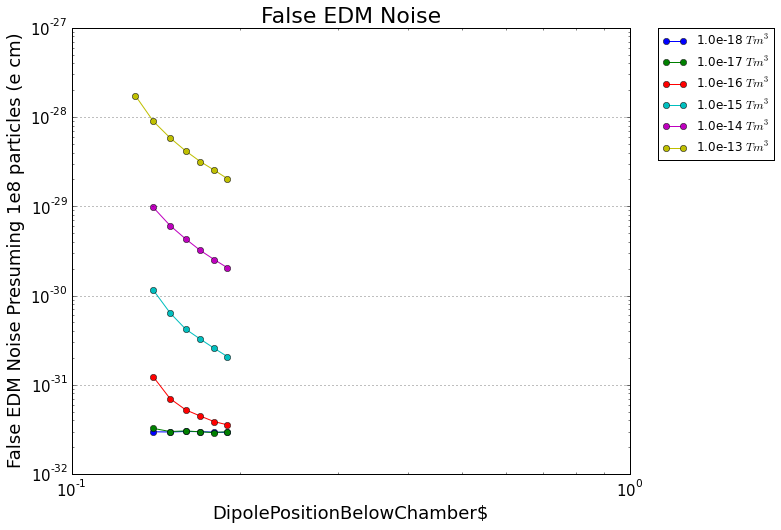

In [26]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8
rcParams['xtick.labelsize'] = 20
e_field=5e5
meas_time=100
x,y=srkdata.get_plot_data_from_database(lines, "DipolePositionBelowChamber", "Par_PhiStDev")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    a,b=zip(*sorted(zip(x[i],y[i]), key=lambda x: x[0]))
    b=list(b)
    a=list(a)
    for j in range(len(b)):
        a[j] = -a[j]
        b[j] = srkanalysis.convert_std_dev_to_false_edm_measurement_error(b[j],e_field,meas_time,1e8)
    plt.loglog(a,b,marker='o',label = legend_titles[i])
plt.xlabel(r'DipolePositionBelowChamber$', fontsize=18)
plt.ylabel('False EDM Noise Presuming 1e8 particles (e cm)', fontsize=18)
plt.title('False EDM Noise', fontsize=22)
plt.tick_params(labelsize=15)
plt.grid(True)
#plt.axis([ 1e-2, 1e4,1e4, 1e12])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

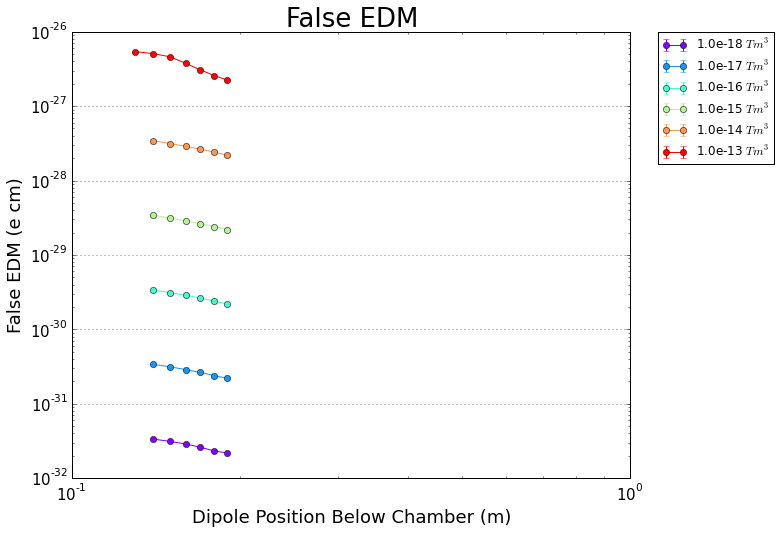

In [27]:
columns=["DipolePositionBelowChamber","FalseEDM","FalseEDMError"]
titles=["False EDM","Dipole Position Below Chamber (m)","False EDM (e cm)"]
lambdas=[lambda x : -x,lambda x: x, lambda x: x]
srkgraphics.make_plot_from_database(lines,columns,titles,legend_titles,lambdas)
plt.yscale('log', noncvposy='clip')
plt.xscale('log', noncvposy='clip')
plt.show()

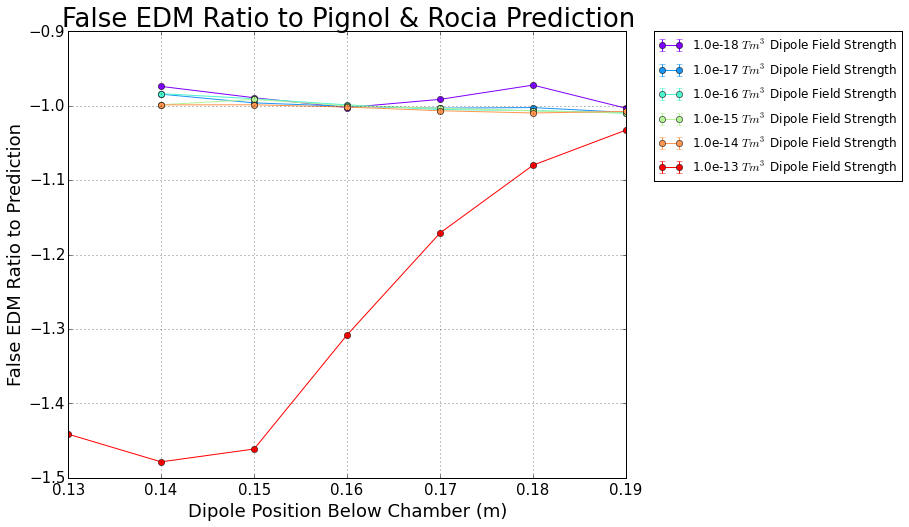

In [29]:
# lines = [range(4820,4828),range(4831,4839),range(4842,4850),range(4842,4850),range(4853,4861),range(4864,4872),range(4875,4883)]
# lines = [x[1:]for x in lines]
legend_titles = ["{:.1e}".format(srkdata.get_data_for_rids_from_database([x[0]],"DipoleFieldStrength")[0][0]
)+ ' $T m^{3}$ Dipole Field Strength' for x in lines]

data = srkdata.get_plot_data_from_database_mult(lines, ["DipolePositionBelowChamber","FalseEDM","FalseEDMError","PRPrediction"])
fixed_data=[]
for line in data:
    fixed_line=[]
    for point in zip(*line):
        fixed_line.append([-point[0],point[1]/point[3],point[2]/point[3]])
    fixed_line=zip(*fixed_line)
    fixed_data.append(fixed_line)
titles=["False EDM Ratio to Pignol & Rocia Prediction","Dipole Position Below Chamber (m)","False EDM Ratio to Prediction"]
srkgraphics.make_plot_from_data(fixed_data, titles, legend_titles)
# plt.xscale('log', noncvposy='clip')
# plt.axis([ 0.001, 0.07,-2, 0])
plt.savefig("/home/mjbales/work/nedm/graphs/DipoleSimsVsPrediction.pdf", bbox_inches='tight')
plt.show()
